### [Guided Capstone Notebooks for Reference](https://github.com/NBPub/DataScienceGuidedCapstone#submissions)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from pathlib import Path

In [3]:
Path.cwd()

WindowsPath('C:/Users/Nish/Classes/AUDL')

In [4]:
teams = pd.read_parquet('data/team_info.parquet')
data = pd.read_parquet('data/game_stats_clean_1.parquet')

### Stats Info, [link](https://theaudl.com/stats/glossary)

#### OFFENSE

 - O-Line Conversion % (Team) - Holds divided by O-line possessions, multiplied by 100 (this number will be a percent).

   - Example: Atlanta has a 60% O-line conversion percentage. “Atlanta’s O-line has scored on 60% of their offensive possessions.”

 - Hold % (Team) - Holds divided by O-line points, multiplied by 100 (this number will be a percent).

   - Example: Atlanta has a 80% hold percentage. “Atlanta has scored on 80% of their O-points.”

 - Holds (Team) - Number of times the O-line scored.

 - O-Line Possessions (Team) - Number of times an O-line had possession of the disc with a chance to score.

 - O-Line Points (Team) - Number of pulls the team has received starting a point.

 - Offensive Efficiency (Individual) - Number of times the offense scores when the player is on the field playing offense, regardless of O-line or D-line, divided by the player’s Offensive Possessions, multiplied by 100 (this number will be a percent).

   - Example: Player X has 60% offensive efficiency. “When Player X is on the field and his team has possession, they score on that possession 60 percent of the time.”

 - Offensive Possessions (Individual) - Number of times the player is on offense and the offense has possession of the disc, regardless of O-line or D-line (break chances included).

 

#### DEFENSE

 - D-Line Conversion % (Team) - Breaks divided by D-line possessions, multiplied by 100 (this number will be a percent).

   - Example: Atlanta has a 40% D-line conversion percentage. “Atlanta’s D-line has scored on 40% of their offensive possessions.”

 - Break % (Team) - Breaks divided by D-line points, multiplied by 100 (this number will be a percent).

   - Example: The Atlanta D-line faced 19 offensive drives in the game, and produced a break on five of them, giving Atlanta a 26% break percentage.

 - Holds (Team) - Number of times the D-line scored.

 - D-Line Possessions (Team) - Number of times a D-line got possession of the disc with a chance to score.

 - D-Line Points (Team) - Number of times the team pulled starting a point.

 - Defensive Efficiency (Team) - Number of times the D-line forces any turnover (block, throwaway, stall, etc) divided by defensive opportunities, multiplied by 100 (this number will be a percent).

   - Example: Atlanta has 30% defensive efficiency. “Atlanta’s D-line forces their opponent to turn it over on 30% of their opponent’s offensive possessions.” OR “Opponents have scored on just 70% of possessions when up against Atlanta’s D-line.”

 - Defensive Opportunities (Team) - Number of times the D-line faces an offensive possession. Total raw opportunities for the defense to force a turnover. 

 - Defensive Efficiency (Individual) - Number of times the defense forces any turnover (block, throwaway, stall, etc) when the player is on the field playing defense, regardless of O-line or D-line, divided by the player’s defensive opportunities, multiplied by 100 (this number will be a percent).

   - Note: Does not matter whether or not it’s the player that forces the turnover, just whether or not the team gets the disc back when the player is out there.

   - Example: Player X has 60% defensive efficiency. “When Player X is on the field and his team is on defense, they get the turnover 60% of the time.”

 - Defensive Opportunities (Individual) - Number of times the player faces an offensive possession, regardless of O-line or D-line. Total raw opportunities for the defense to force a turnover when the specific player is on the field. 

### Cleaning Artifacts: `-1`
### replace -1 values with None
#### will change dtype of columns with empty values from int to float

In [6]:
data.where(data != -1, np.nan, inplace=True)
data.isnull().sum().sum()/(data.shape[0]*data.shape[1])

0.22332191346275854

In [35]:
data.isnull().groupby(data.date.dt.year).sum().T.style.background_gradient(cmap='Spectral_r', axis=None)

date,2014,2015,2016,2017,2018,2019,2021,2022,2023
game,0,0,0,0,0,0,0,0,0
date,0,0,0,0,0,0,0,0,0
tz,0,0,0,0,0,0,0,0,0
location,126,185,193,179,19,0,0,1,0
week,0,0,0,0,0,0,0,0,0
home,0,0,0,0,0,0,0,0,0
away,0,0,0,0,0,0,0,0,0
home_score,0,0,0,0,0,0,0,0,0
away_score,0,0,0,0,0,0,0,0,0
away_completions,2,2,2,0,0,0,0,0,0


## Final Cleaning
#### Remove 2012, 2013 seasons

In [8]:
print(data.shape)
data = data[data.date.dt.year > 2013]
print('removed 2012,2013 seasons')
print(data.shape)

(1491, 37)
removed 2012,2013 seasons
(1326, 37)


### Playground
 - games not symmetrical due to quarters. same concept is possible with traditional halves.
   - therefore calculate break rate and hold rate independently
 - **D Line** possessions per point distribution looks better than poss per break
 - can't decide what's better for **O Line** (pos per pt vs. pos per break)

In [49]:
data[data.home_o_points != data.away_d_points].shape

(89, 39)

In [47]:
data[data.home_d_points != data.away_o_points].shape

(96, 39)

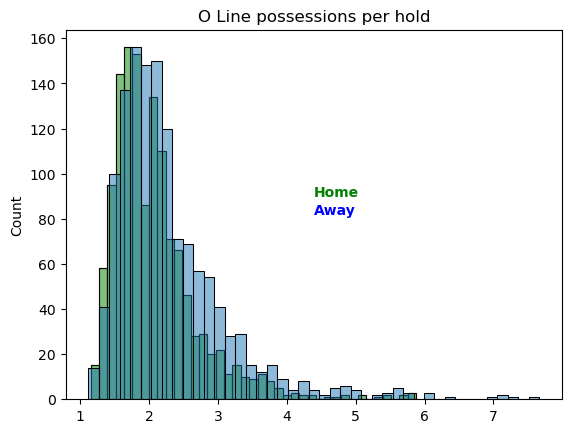

In [68]:
sns.histplot(x=data.home_o_possessions / data.home_o_scores, color='g', alpha=0.5)
sns.histplot(x=data.away_o_possessions / data.away_o_scores, alpha=0.5)

tx = sum(plt.xlim())/2
ty = sum(plt.ylim())/2

plt.text(tx,ty+.1*ty,'Home', color = 'g', fontweight='bold')
plt.text(tx,ty,'Away',color='b', fontweight='bold')

plt.title('O Line possessions per hold')
plt.show()

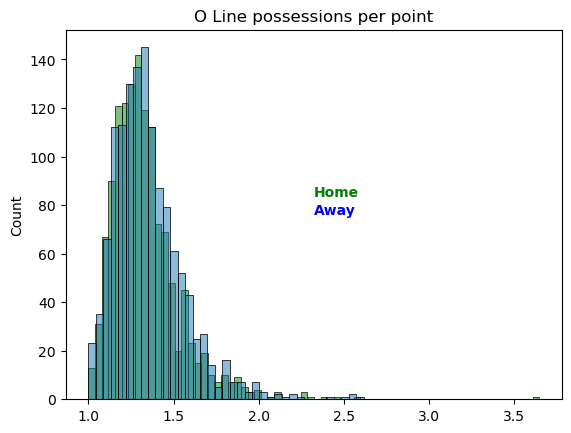

In [69]:
sns.histplot(x=data.home_o_possessions / data.home_o_points, color='g', alpha=0.5)
sns.histplot(x=data.away_o_possessions / data.away_o_points, alpha=0.5)

tx = sum(plt.xlim())/2
ty = sum(plt.ylim())/2

plt.text(tx,ty+.1*ty,'Home', color = 'g', fontweight='bold')
plt.text(tx,ty,'Away',color='b', fontweight='bold')

plt.title('O Line possessions per point')
plt.show()

In [73]:
data.columns

Index(['game', 'date', 'tz', 'location', 'week', 'home', 'away', 'home_score',
       'away_score', 'away_completions', 'away_throws', 'away_hucks_completed',
       'away_hucks', 'away_blocks', 'away_turnovers', 'away_o_scores',
       'away_o_points', 'away_o_possessions', 'away_d_scores', 'away_d_points',
       'away_d_possessions', 'away_rz_scores', 'away_rz_possessions',
       'home_completions', 'home_throws', 'home_hucks_completed', 'home_hucks',
       'home_blocks', 'home_turnovers', 'home_o_scores', 'home_o_points',
       'home_o_possessions', 'home_d_scores', 'home_d_points',
       'home_d_possessions', 'home_rz_scores', 'home_rz_possessions',
       'home_win', 'home_margin'],
      dtype='object')

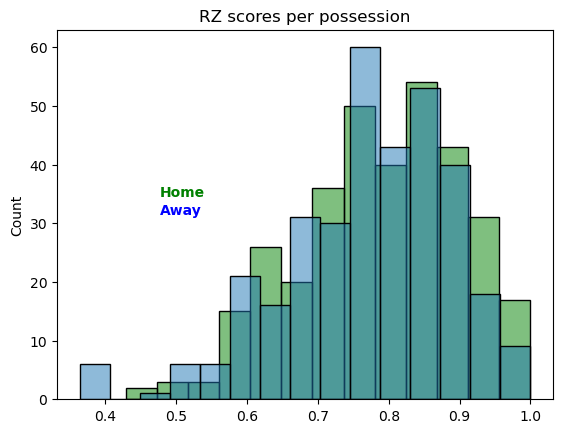

In [78]:
sns.histplot(x=data.home_rz_scores / data.home_rz_possessions, color='g', alpha=0.5)
sns.histplot(x=data.away_rz_scores / data.away_rz_possessions, alpha=0.5)

tx = .7*sum(plt.xlim())/2
ty = sum(plt.ylim())/2

plt.text(tx,ty+.1*ty,'Home', color = 'g', fontweight='bold')
plt.text(tx,ty,'Away',color='b', fontweight='bold')

plt.title('RZ scores per possession')
plt.show()

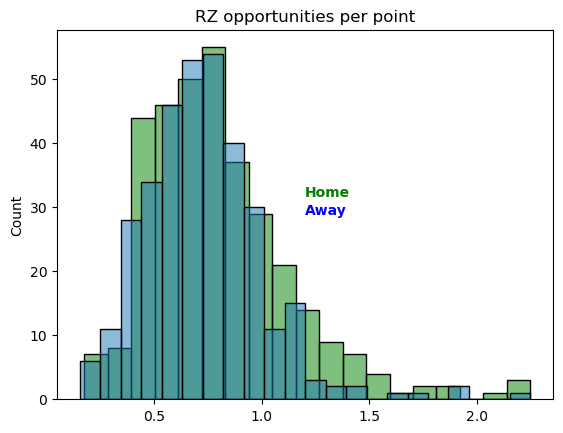

In [80]:
sns.histplot(x=data.home_rz_possessions / data.home_o_points, color='g', alpha=0.5)
sns.histplot(x=data.away_rz_possessions / data.away_o_points, alpha=0.5)

tx = sum(plt.xlim())/2
ty = sum(plt.ylim())/2

plt.text(tx,ty+.1*ty,'Home', color = 'g', fontweight='bold')
plt.text(tx,ty,'Away',color='b', fontweight='bold')

plt.title('RZ opportunities per point')
plt.show()

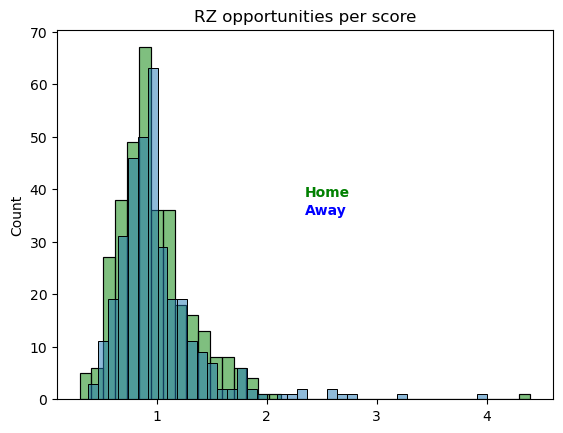

In [87]:
sns.histplot(x=data.home_o_scores / data.home_rz_possessions, color='g', alpha=0.5)
sns.histplot(x= data.away_o_scores/data.away_rz_possessions , alpha=0.5)

tx = sum(plt.xlim())/2
ty = sum(plt.ylim())/2

plt.text(tx,ty+.1*ty,'Home', color = 'g', fontweight='bold')
plt.text(tx,ty,'Away',color='b', fontweight='bold')

plt.title('RZ opportunities per score')
plt.show()

In [50]:
data[['home_blocks','home_d_possessions']]

,home_blocks,home_d_possessions
2061,15,15.0
2059,9,8.0
2057,11,15.0
2058,5,11.0
2062,13,9.0
...,...,...
2973,11,9.0
3046,9,15.0
3006,12,10.0
3047,11,10.0


In [56]:
(data.home_d_possessions / data.home_d_points).describe()

count    1325.000000
mean        0.677752
std         0.268278
min         0.066667
25%         0.500000
50%         0.645161
75%         0.827586
max         1.950000
dtype: float64

In [59]:
(data.home_d_possessions / data.home_d_points).describe()

count    1325.000000
mean        0.677752
std         0.268278
min         0.066667
25%         0.500000
50%         0.645161
75%         0.827586
max         1.950000
dtype: float64

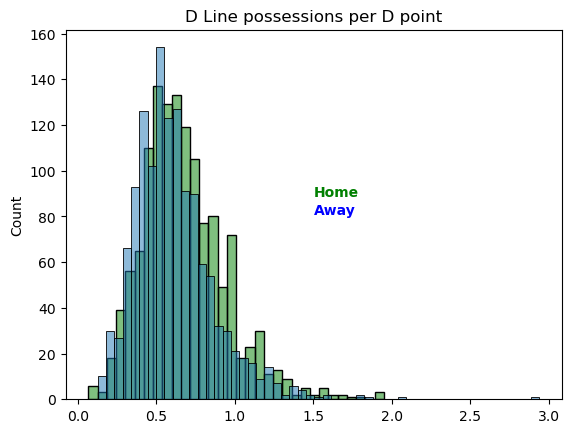

In [62]:
sns.histplot(x=data.home_d_possessions/data.home_d_points, color='g', alpha=0.5)
sns.histplot(x=data.away_d_possessions/data.away_d_points, alpha=0.5)

tx = sum(plt.xlim())/2
ty = sum(plt.ylim())/2

plt.text(tx,ty+.1*ty,'Home', color = 'g', fontweight='bold')
plt.text(tx,ty,'Away',color='b', fontweight='bold')

plt.title('D Line possessions per D point')
plt.show()

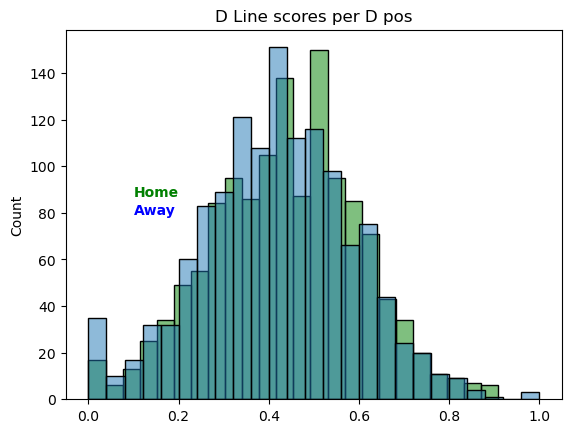

In [72]:
sns.histplot(x=data.home_d_scores/data.home_d_possessions, color='g', alpha=0.5)
sns.histplot(x=data.away_d_scores/data.away_d_possessions, alpha=0.5)

tx = .2*sum(plt.xlim())/2
ty = sum(plt.ylim())/2

plt.text(tx,ty+.1*ty,'Home', color = 'g', fontweight='bold')
plt.text(tx,ty,'Away',color='b', fontweight='bold')

plt.title('D Line scores per D pos')
plt.show()

## Add Success Criteria: 
#### Home Win
#### Home Margin

In [10]:
data.loc[:,'home_win'] = data.home_score > data.away_score
data.loc[:,'home_margin'] = data.home_score - data.away_score

In [11]:
# should skip over location
data.corr(numeric_only=True).loc[['home_margin','home_win'],:].T.style\
        .background_gradient(cmap = 'PiYG', vmin=-1,vmax=1)\
        .format(formatter="{:.3f}")

,home_margin,home_win
location,-0.020,-0.036
home_score,0.726,0.558
away_score,-0.696,-0.531
away_completions,-0.025,-0.030
away_throws,0.058,0.027
away_hucks_completed,-0.168,-0.120
away_hucks,0.038,0.051
away_blocks,-0.432,-0.392
away_turnovers,0.519,0.356
away_o_scores,-0.156,-0.069


### PCA with basic stats

In [12]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [75]:
drop_cols = ['away_hucks_completed','away_hucks','home_hucks_completed','home_hucks', 'away_rz_scores', 'away_rz_possessions', 'home_rz_scores', 'home_rz_possessions']

In [76]:
scaled_data_1 = data.iloc[:,9:]
scaled_data_1.shape

(1326, 30)

In [77]:
scaled_data_1.drop(columns=drop_cols, inplace=True)
scaled_data_1.shape

(1326, 22)

In [78]:
scaled_data_1.dropna(inplace=True)
scaled_data_1.shape

(1320, 22)

In [79]:
scaled_data_1.isnull().groupby(data.date.dt.year).sum().T.style.background_gradient(cmap='Spectral_r', axis=None)

date,2014,2015,2016,2017,2018,2019,2021,2022,2023
away_completions,0,0,0,0,0,0,0,0,0
away_throws,0,0,0,0,0,0,0,0,0
away_blocks,0,0,0,0,0,0,0,0,0
away_turnovers,0,0,0,0,0,0,0,0,0
away_o_scores,0,0,0,0,0,0,0,0,0
away_o_points,0,0,0,0,0,0,0,0,0
away_o_possessions,0,0,0,0,0,0,0,0,0
away_d_scores,0,0,0,0,0,0,0,0,0
away_d_points,0,0,0,0,0,0,0,0,0
away_d_possessions,0,0,0,0,0,0,0,0,0


In [80]:
 # save for labelling
col_names = scaled_data_1.columns
home_teams = data.loc[scaled_data_1.index,'home']

# scale
scaled_data_1 = scale(scaled_data_1)
# save into df
scaled_df = pd.DataFrame(scaled_data_1, columns = col_names)

In [81]:
scaled_data_1.mean(), scaled_data_1.std(ddof=0)

(-5.089286812606778e-17, 0.9999999999999999)

In [82]:
pca1 = PCA().fit(scaled_data_1)

In [83]:
pca1.explained_variance_ratio_

array([3.74761091e-01, 2.03542448e-01, 1.59518248e-01, 1.04045512e-01,
       6.16153738e-02, 2.89943826e-02, 1.95173995e-02, 1.68123173e-02,
       1.21265182e-02, 1.12667633e-02, 2.68445051e-03, 1.94298818e-03,
       1.37361092e-03, 5.04843757e-04, 4.01797749e-04, 2.98961126e-04,
       2.35965178e-04, 1.82336583e-04, 1.18586513e-04, 5.64060050e-05,
       8.43823658e-33, 1.02348715e-33])

In [84]:
pca1.explained_variance_ratio_.cumsum()

array([0.37476109, 0.57830354, 0.73782179, 0.8418673 , 0.90348267,
       0.93247706, 0.95199445, 0.96880677, 0.98093329, 0.99220005,
       0.9948845 , 0.99682749, 0.9982011 , 0.99870595, 0.99910774,
       0.99940671, 0.99964267, 0.99982501, 0.99994359, 1.        ,
       1.        , 1.        ])

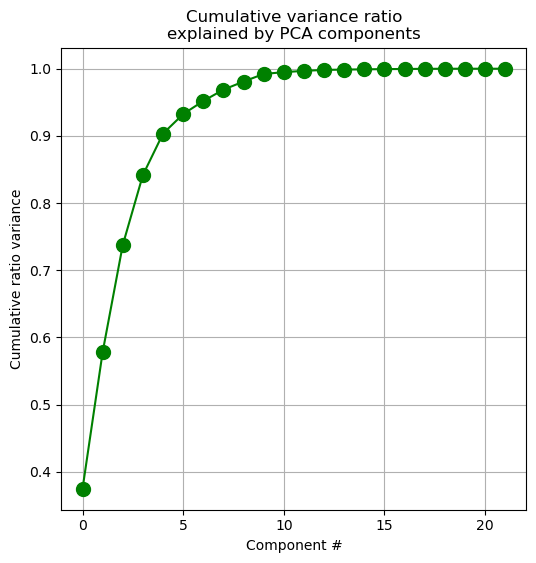

In [86]:
plt.subplots(figsize=(6, 6))
plt.plot(pca1.explained_variance_ratio_.cumsum(), 'g-o', markersize=10)
plt.grid()
plt.xlabel('Component #')
plt.ylabel('Cumulative ratio variance')
plt.title('Cumulative variance ratio\nexplained by PCA components')
plt.savefig('graphs/PCA1_Explained_variance_cumsum.png')
plt.show()

In [88]:
pca_1_x = pca1.transform(scaled_data_1)

In [ ]:
x = state_pca_x[:, 0]
y = state_pca_x[:, 1]
state = state_summary_index
pc_var = 100 * state_pca.explained_variance_ratio_.cumsum()[1]
plt.subplots(figsize=(10,8))
plt.scatter(x=x, y=y)
plt.xlabel('First component')
plt.ylabel('Second component')
plt.title(f'Ski states summary PCA, {pc_var:.1f}% variance explained')
for s, x, y in zip(state, x, y):
    plt.annotate(s, (x+.03, y+.03), fontsize='x-small')

In [89]:
pca_1_x

array([[ 1.18712384e+00,  1.15207342e+00,  1.91626024e+00, ...,
         2.52636627e-03, -6.59147356e-16,  1.36421730e-17],
       [-4.46944957e+00, -9.18253554e-01, -1.25728054e+00, ...,
         2.01211485e-05,  5.40831501e-16,  1.04774160e-16],
       [-4.11352409e+00,  2.69916005e+00, -1.53665099e+00, ...,
        -1.53009249e-02, -1.80276308e-16, -9.36342030e-16],
       ...,
       [ 2.99423306e-01, -1.36155645e+00,  2.32912408e+00, ...,
         7.07436154e-02, -3.50380872e-16, -2.13031539e-16],
       [ 1.25594672e+00,  5.55710916e-01,  2.88602917e+00, ...,
         6.15982518e-03,  8.83509197e-17,  4.86452195e-16],
       [ 4.01525927e+00,  1.79163049e+00,  1.07299440e+00, ...,
        -5.75600697e-03, -4.35152347e-16, -3.39830904e-17]])

## Add Derived Stats, efficiency / effectiveness stats
##### be sure not to repeat from home and away perspectives

 - completions / throws
 - hucks_completed / hucks
 - blocks / opponent throws
 - O scores per point
 - O possessions per O score
 - D possessions per O score
 - D possessions per D score

In [118]:
### OFFENSE

# comp %
data['home_completion_rate'] = data.home_completions / data.home_throws
data['away_completion_rate'] = data.away_completions / data.away_throws

# huck %
data['home_huck_rate'] = data.home_hucks_completed / data.home_hucks
data['away_huck_rate'] = data.away_hucks_completed / data.away_hucks

# hold %
data['home_hold_rate'] = data.home_o_scores / data.home_o_points
data['away_hold_rate'] = data.away_o_scores / data.away_o_points

# O Line possessions per hold
data['home_o_poss_per_hold'] = data.home_o_possessions / data.home_o_scores
data['away_o_poss_per_hold'] = data.away_o_possessions / data.away_o_scores

### DEFENSE

# block %
data['home_block_rate'] = data.home_blocks / data.away_throws
data['away_block_rate'] = data.away_blocks / data.home_throws

# break %, games not perfectly symmetrical so calculate in addition to hold %
data['home_break_rate'] = data.home_d_scores / data.home_d_points
data['away_break_rate'] = data.away_d_scores / data.away_d_points

# D Line possessions per point
data['home_d_poss_per_hold'] = data.home_d_possessions / data.home_d_points
data['away_d_poss_per_hold'] = data.away_d_possessions / data.away_d_points

# D Line breaks per possession
data['home_break_per_poss'] = data.home_d_scores / data.home_d_possessions
data['away_break_per_poss'] = data.away_d_scores / data.away_d_possessions

### REDZONE

# redzone efficiency
data['home_rz_rate'] = data.home_rz_scores / data.home_rz_possessions
data['away_rz_rate'] = data.away_rz_scores / data.away_rz_possessions

## Investigate Correlations with new stuff


In [92]:
data.columns[9:]

Index(['away_completions', 'away_throws', 'away_hucks_completed', 'away_hucks',
       'away_blocks', 'away_turnovers', 'away_o_scores', 'away_o_points',
       'away_o_possessions', 'away_d_scores', 'away_d_points',
       'away_d_possessions', 'away_rz_scores', 'away_rz_possessions',
       'home_completions', 'home_throws', 'home_hucks_completed', 'home_hucks',
       'home_blocks', 'home_turnovers', 'home_o_scores', 'home_o_points',
       'home_o_possessions', 'home_d_scores', 'home_d_points',
       'home_d_possessions', 'home_rz_scores', 'home_rz_possessions',
       'home_win', 'home_margin', 'home_completion_rate',
       'away_completion_rate', 'home_huck_rate', 'away_huck_rate',
       'home_hold_rate', 'away_hold_rate', 'home_o_poss_per_hold',
       'away_o_poss_per_hold', 'home_block_rate', 'away_block_rate',
       'home_break_rate', 'away_break_rate', 'home_d_poss_per_hold',
       'away_d_poss_per_hold', 'home_break_per_poss', 'away_break_per_poss',
       'home_rz_rat

In [119]:
# new stats
data.iloc[:,9:].corr(numeric_only=True).loc[['home_margin','home_win'],:].iloc[:,30:].T.style\
        .background_gradient(cmap = 'PiYG', vmin=-1,vmax=1)\
        .format(formatter="{:.3f}")

,home_margin,home_win
home_completion_rate,0.184,0.175
away_completion_rate,-0.288,-0.194
home_huck_rate,0.196,0.184
away_huck_rate,-0.260,-0.223
home_hold_rate,0.750,0.615
away_hold_rate,-0.806,-0.619
home_o_poss_per_hold,-0.534,-0.444
away_o_poss_per_hold,0.627,0.397
home_block_rate,0.320,0.233
away_block_rate,-0.236,-0.218


In [124]:
# old stats stats
data.iloc[:,9:].corr(numeric_only=True).loc[['home_margin','home_win'],:].iloc[:,:28].T.style\
        .background_gradient(cmap = 'PiYG', vmin=-1,vmax=1)\
        .format(formatter="{:.3f}")

,home_margin,home_win
away_completions,-0.025,-0.030
away_throws,0.058,0.027
away_hucks_completed,-0.168,-0.120
away_hucks,0.038,0.051
away_blocks,-0.432,-0.392
away_turnovers,0.519,0.356
away_o_scores,-0.156,-0.069
away_o_points,0.704,0.546
away_o_possessions,0.702,0.523
away_d_scores,-0.810,-0.676


In [108]:
for i,val in enumerate(data.columns):
    print(i,val)

0 game
1 date
2 tz
3 location
4 week
5 home
6 away
7 home_score
8 away_score
9 away_completions
10 away_throws
11 away_hucks_completed
12 away_hucks
13 away_blocks
14 away_turnovers
15 away_o_scores
16 away_o_points
17 away_o_possessions
18 away_d_scores
19 away_d_points
20 away_d_possessions
21 away_rz_scores
22 away_rz_possessions
23 home_completions
24 home_throws
25 home_hucks_completed
26 home_hucks
27 home_blocks
28 home_turnovers
29 home_o_scores
30 home_o_points
31 home_o_possessions
32 home_d_scores
33 home_d_points
34 home_d_possessions
35 home_rz_scores
36 home_rz_possessions
37 home_win
38 home_margin
39 home_completion_rate
40 away_completion_rate
41 home_huck_rate
42 away_huck_rate
43 home_hold_rate
44 away_hold_rate
45 home_o_poss_per_hold
46 away_o_poss_per_hold
47 home_block_rate
48 away_block_rate
49 home_break_rate
50 away_break_rate
51 home_d_poss_per_hold
52 away_d_poss_per_hold
53 home_break_per_poss
54 away_break_per_poss
55 home_rz_rate
56 away_rz_rate


In [148]:
not param

True

In [143]:
x[0][0].title.get_text()

'away_completions'

In [158]:
data[['home_o_points','home_margin']].corr().iloc[0,1]

-0.6824792953461296

<Axes: xlabel='away_completions', ylabel='home_margin'>

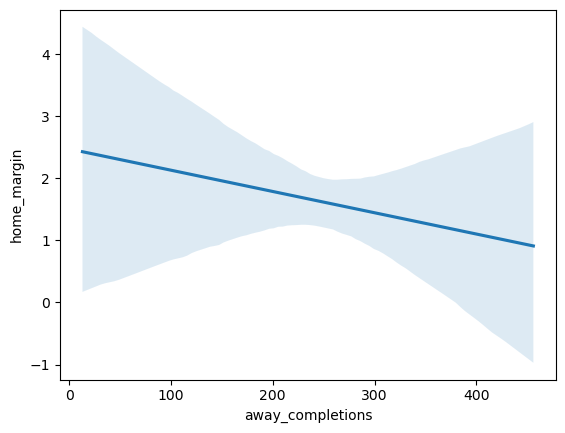

In [132]:
sns.regplot(data, x='away_completions', y='home_margin', scatter=False)

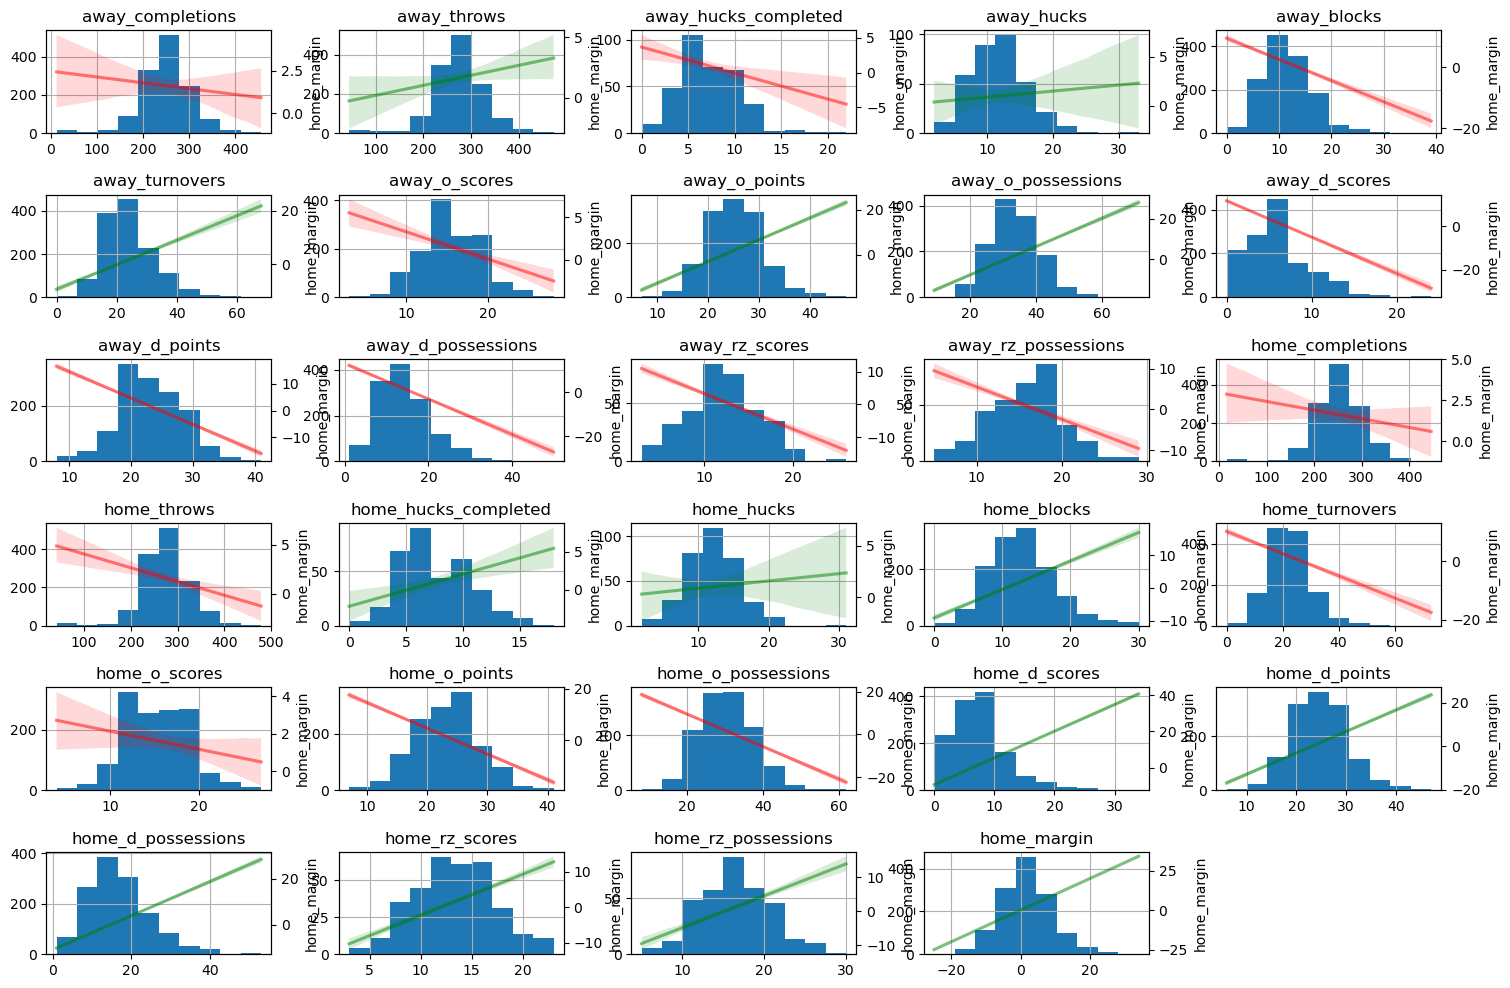

In [161]:
x = data.iloc[:,9:39].hist(figsize=(18,12))
plt.subplots_adjust(hspace=0.6)
for row in x:
    for graph in row:
        param = graph.title.get_text()
        if param:
            c = 'g' if data[[param,'home_margin']].corr().iloc[0,1] > 0 else 'r'
            sns.regplot(data, x=param, y='home_margin', scatter=False,
                   ax = graph.twinx(), color=c, line_kws=dict(alpha=0.5))

#plt.savefig('data/initial_distributions.png', dpi=300)
plt.show()

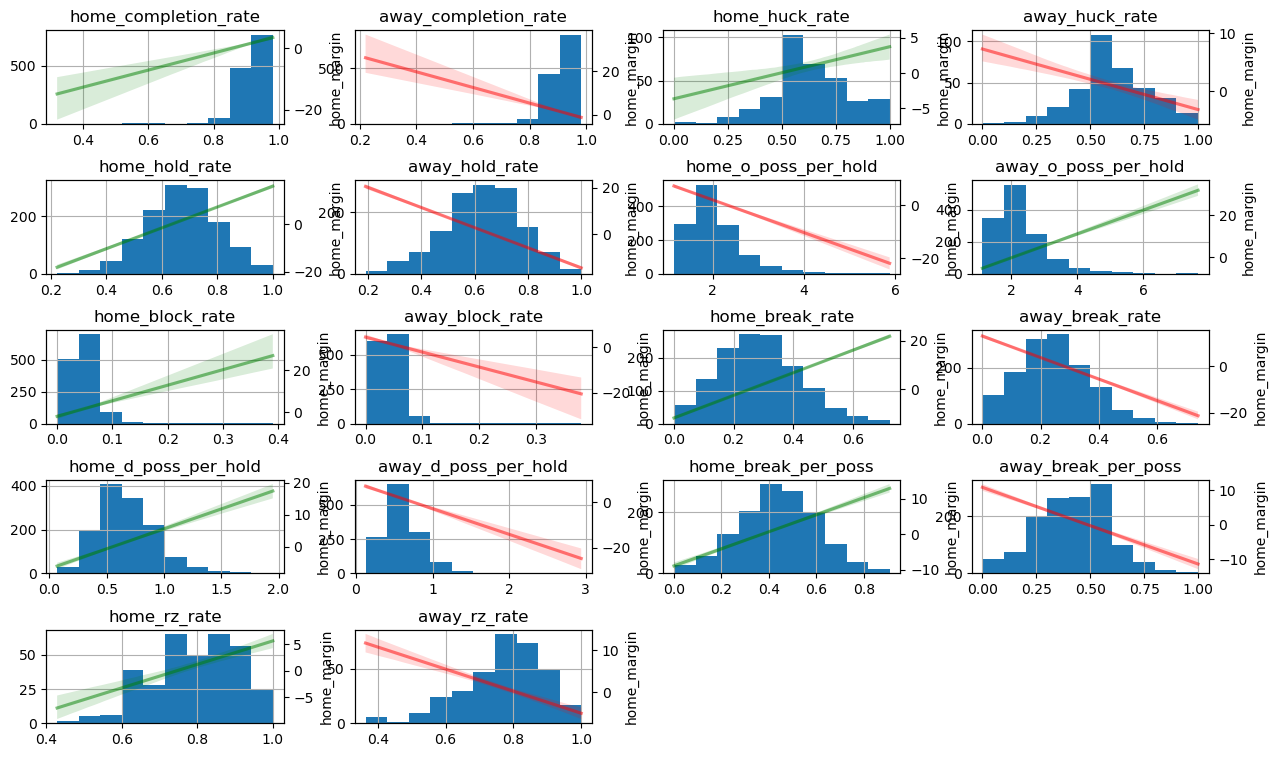

In [164]:
# sub = data.iloc[:,39:]

x = data.iloc[:,39:].hist(figsize=(15,9))
plt.subplots_adjust(hspace=0.6)

for row in x:
    for graph in row:
        param = graph.title.get_text()
        if param:
            c = 'g' if data[[param,'home_margin']].corr().iloc[0,1] > 0 else 'r'
            sns.regplot(data, x=param, y='home_margin', scatter=False,
                   ax = graph.twinx(), color=c, line_kws=dict(alpha=0.5))

#plt.savefig('data/initial_distributions.png', dpi=300)
plt.show()

## Try PCA
#### Which features to include / remove?